In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns=1000

In [22]:
data = pd.read_csv('mushrooms_all.csv')

In [23]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [25]:
data.shape

(8124, 23)

In [24]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [28]:
#target, edible or poisonous 
data['class'].value_counts()


e    4208
p    3916
Name: class, dtype: int64

In [31]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [43]:
for col in data.columns: 
    print(data[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
0    4748
1    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
0    7914
1     210
Name: gill-attachment, dtype: int64
0    6812
1    1312
Name: gill-spacing, dtype: int64
0    5612
1    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
1    4608
0    3516
Name: stalk-shape, dtype: int64
b        3776
other    2480
e        1120
c         556
r         192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y     

In [35]:
data['bruises']=np.where(data['bruises']=='t',1,data['bruises'])
data['bruises']=np.where(data['bruises']=='f',0,data['bruises'])

In [36]:
data['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

In [37]:
data['gill-attachment']=np.where(data['gill-attachment']=='f',0,data['gill-attachment'])
data['gill-attachment']=np.where(data['gill-attachment']=='a',1,data['gill-attachment'])

In [39]:
data['gill-spacing']=np.where(data['gill-spacing']=='c',0,data['gill-spacing'])
data['gill-spacing']=np.where(data['gill-spacing']=='w',1,data['gill-spacing'])

In [40]:
data['gill-size']=np.where(data['gill-size']=='b',0,data['gill-size'])
data['gill-size']=np.where(data['gill-size']=='n',1,data['gill-size'])

In [41]:
data['stalk-shape']=np.where(data['stalk-shape']=='e',0,data['stalk-shape'])
data['stalk-shape']=np.where(data['stalk-shape']=='t',1,data['stalk-shape'])

In [42]:
#assign missing values to 'other'
data['stalk-root']=np.where(data['stalk-root']=='?','other',data['stalk-root'])

In [44]:
#dropping veil-type column since values are all the same
data.drop(columns='veil-type',inplace=True)

In [45]:
data['ring-number']=np.where(data['ring-number']=='n',0,data['ring-number'])
data['ring-number']=np.where(data['ring-number']=='o',1,data['ring-number'])
data['ring-number']=np.where(data['ring-number']=='t',2,data['ring-number'])

In [46]:
data.shape

(8124, 22)

In [47]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,0,n,0,0,0,b,1,b,s,s,w,w,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


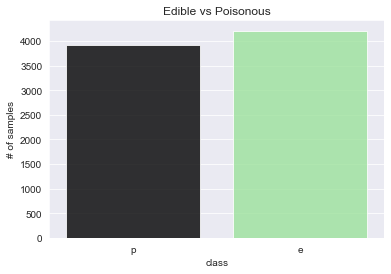

In [51]:
# Target variable countplot
#balanaced target
sns.set_style('darkgrid')
plt.figure()
sns.countplot(data['class'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of samples')
plt.show()

In [53]:
features=data.drop(columns='class')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


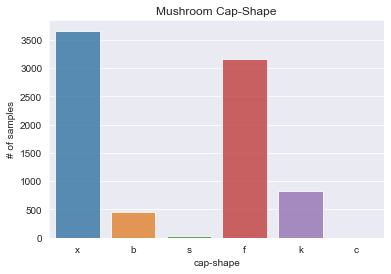

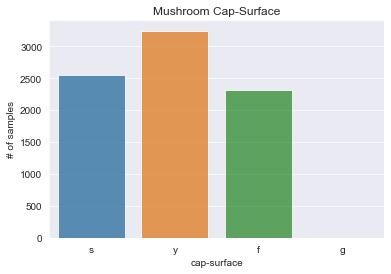

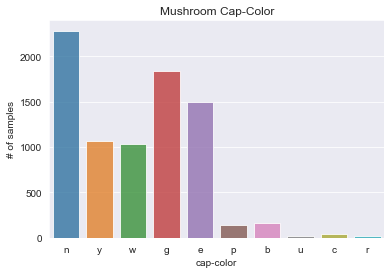

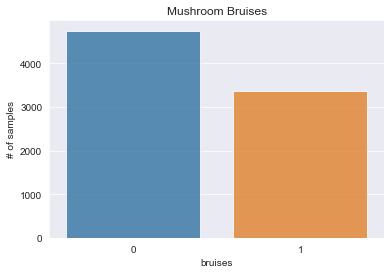

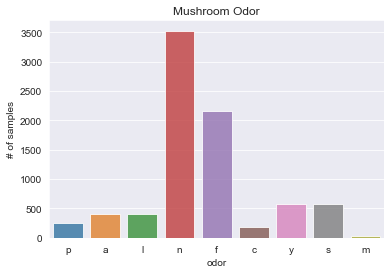

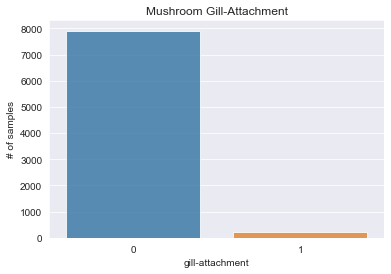

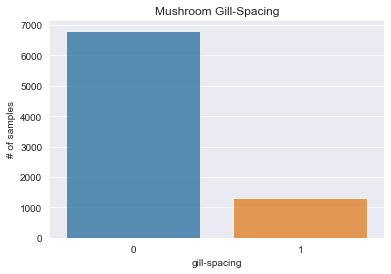

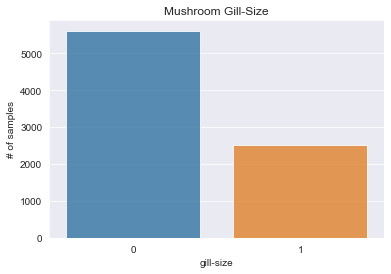

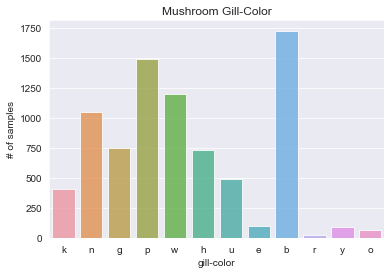

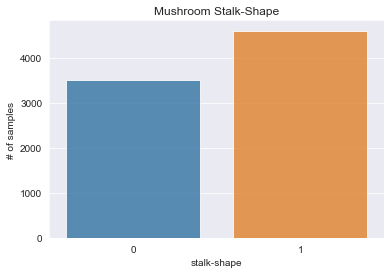

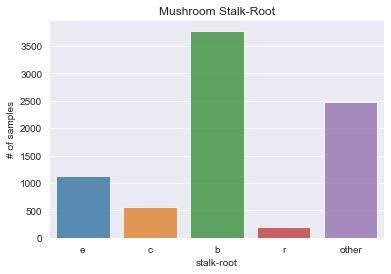

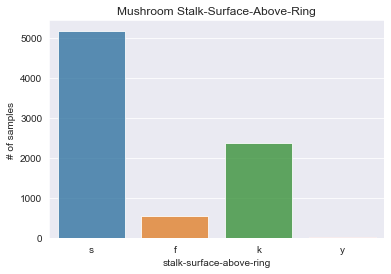

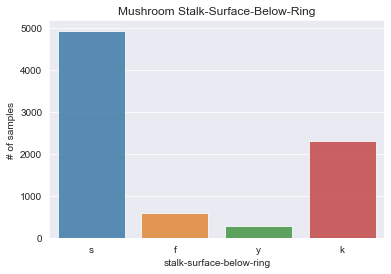

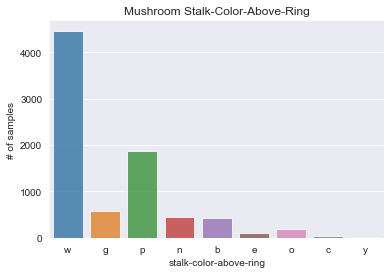

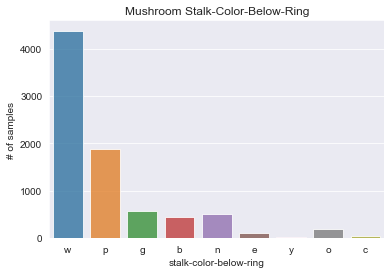

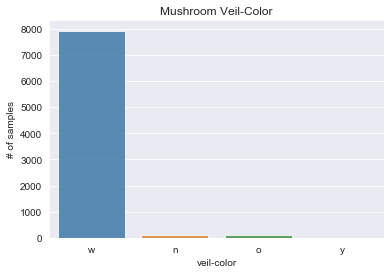

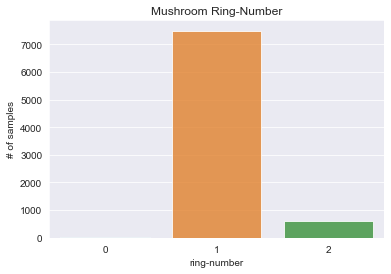

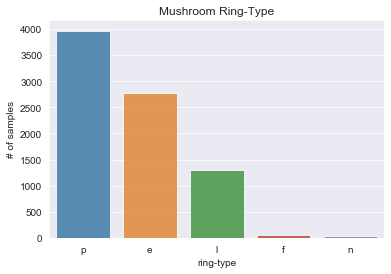

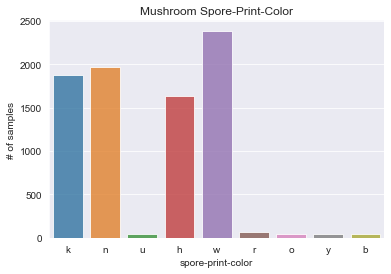

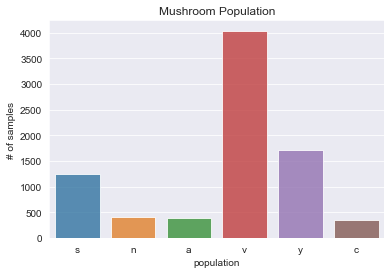

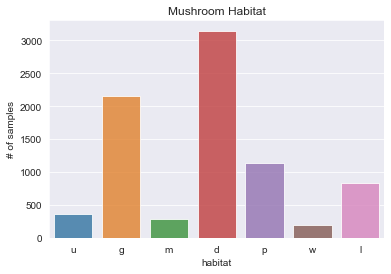

In [71]:
#barplots for each feature
for col in features.columns:
    sns.set_style('darkgrid')
    plt.figure()
    sns.countplot(features[col], alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


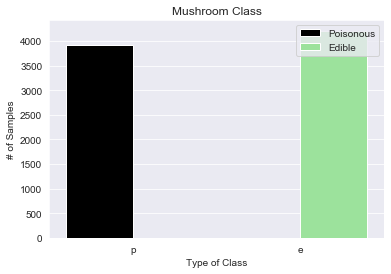

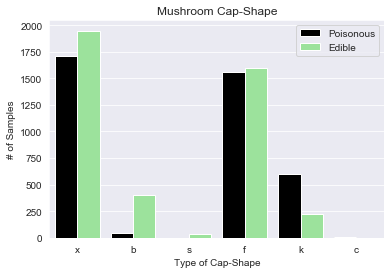

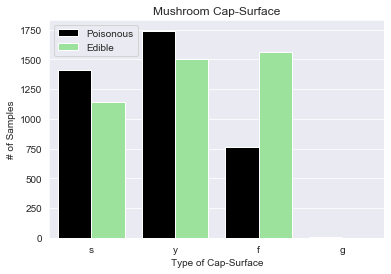

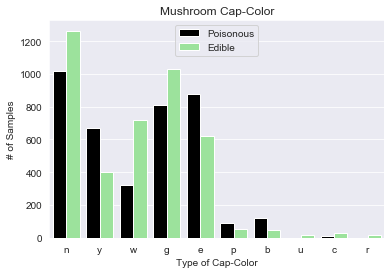

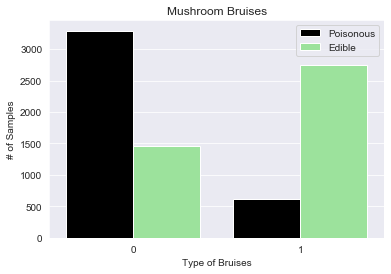

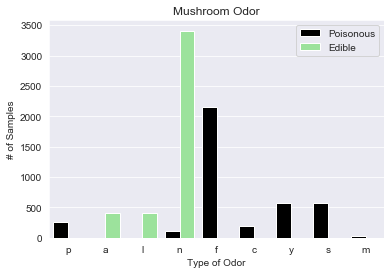

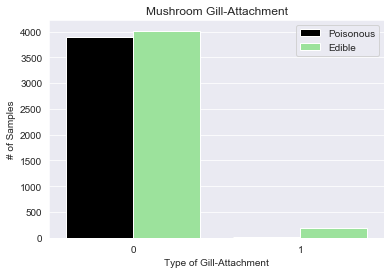

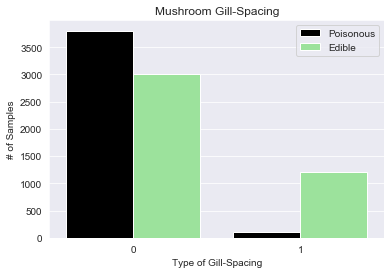

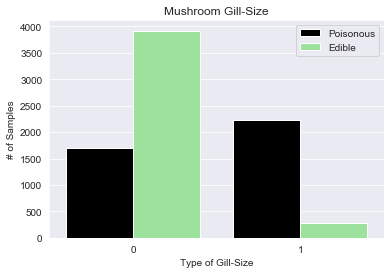

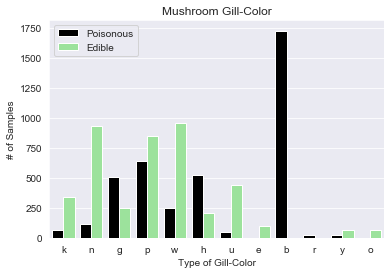

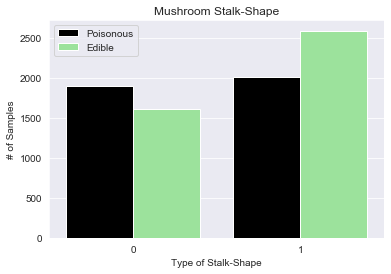

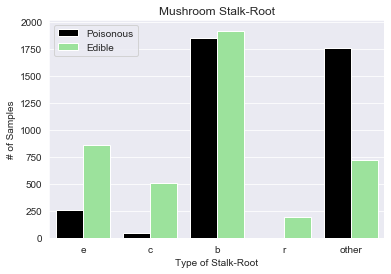

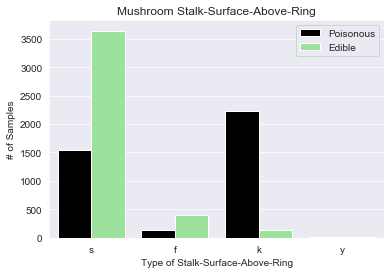

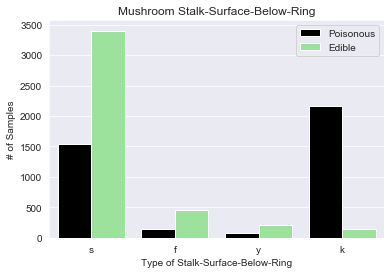

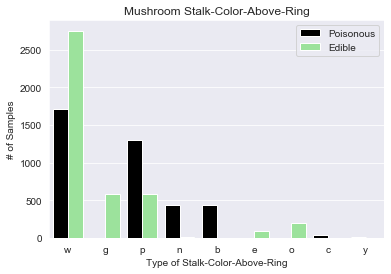

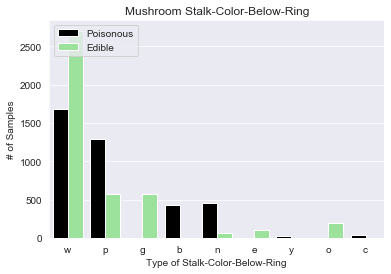

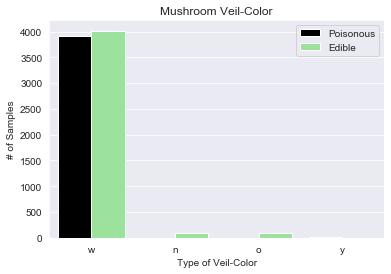

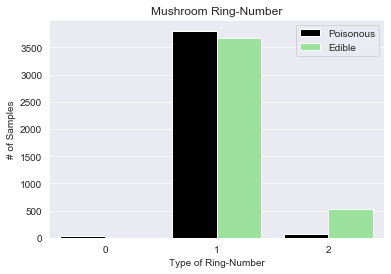

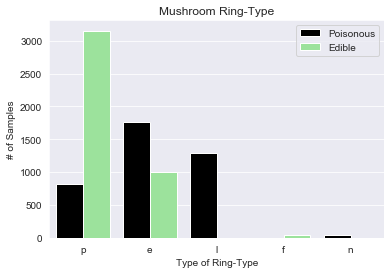

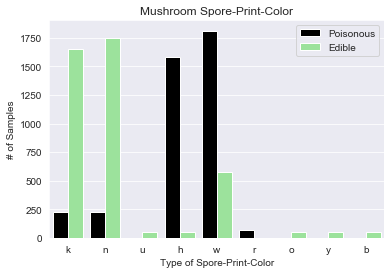

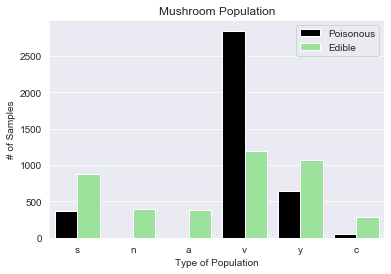

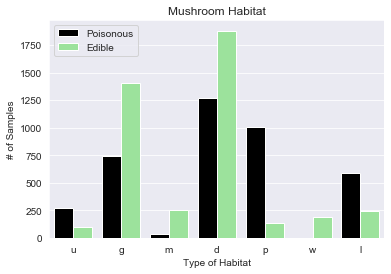

In [75]:
for col in data:
    fig,ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=data['class'],palette=['black','lightgreen'],data=data)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])